Raden Bagus Muhammad AdryanPutra Adhy Wijaya 	(21/473083/PA/20366) \\
Azzakhruf Aryan Nur Ihsan					(21/477261/PA/20646) \\
Achmad Hadzami Setiawan					(21/480222/PA/20851) \\
Vincent Yeozekiel						(21/481885/PA/20999) \\
Dicky Setiawan						(22/511229/NPA/19857) \\
Muhammad Linggar Ryanidha				(21/475209/PA/20548) 

# Import Libraries

Petunjuk menjalankan program:
1. Silahkan Bapak dapat menjalankan kode dibawah ini terlebih dahulu untuk mengimport library yang dibutuhkan dan menghubungkan colab dengan google drive

In [ ]:
# Import libraries
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import PIL
from tensorflow import keras
from keras.layers import *
from keras.models import *
import keras.utils as image
from keras.preprocessing.image import ImageDataGenerator
import os, shutil
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Define and Load Model

2. Silahkan Bapak dapat menjalankan kode-kode dibawah ini untuk mendefinisikan dan mengload model yang sudah dilatih sebelumnya

In [ ]:
model= Sequential()
model.add(Conv2D(filters=64,activation="relu",kernel_size=3,input_shape=(150,150,3)))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Conv2D(filters=64, activation="relu",kernel_size=3))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Conv2D(filters=128, activation="relu",kernel_size=3))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Conv2D(filters=128, activation="relu",kernel_size=3))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(units=512, activation="relu"))
model.add(Dense(units=1,activation="sigmoid"))

# model.summary()

In [ ]:
model.load_weights('/content/drive/MyDrive/CV/Proyek Akhir/Kelompok 2 Proyek Akhir PKAC/fire_weight1_33K_minggu.h5')
# untuk path model 'fire_weight1_33K_minggu.h5' dapat diganti atau disesuaikan dengan lokasi google drive atau lokal laptop Bapak nggih

In [ ]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

In [ ]:
def UNet():
    inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

    #Contraction path
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = tf.keras.layers.Dropout(0.3)(c5)
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    #Expansive path 
    u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c4])
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = tf.keras.layers.Dropout(0.2)(c6)
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c3])
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = tf.keras.layers.Dropout(0.2)(c7)
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = tf.keras.layers.Dropout(0.1)(c8)
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = tf.keras.layers.Dropout(0.1)(c9)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    return model

In [ ]:
model_unet = UNet()

In [ ]:
model_unet.load_weights('/content/drive/MyDrive/CV/Proyek Akhir/Kelompok 2 Proyek Akhir PKAC/UNetWeight1.h5')
# untuk path model 'UNetWeight1.h5' dapat diganti atau disesuaikan dengan lokasi google drive atau lokal laptop Bapak nggih

# Fungsi untuk menampilkan hasil (Fungsi Tambahan)

Jika Bapak ingin melihat hasilnya secara langsung, Bapak dapat menjalankan kode dibawah ini dan digunakan pada fungsi detectFire()

In [ ]:
def show_img(real, mask):
    image_size = 128
    fig = plt.figure()
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(real)

    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(mask, cmap="gray")

# Fungsi detectFire()

3. Silahkan Bapak dapat menjalankan kode-kode dibawah ini untuk mendefinisikan fungsi detectFire() beserta contoh penggunaannya

In [ ]:
# predicting image with own model
import keras.utils as image
def detectFire(imx_path):
    img_asli = cv2.imread(imx_path)
    img = image.load_img(imx_path, target_size=(150,150))
    img_unet = cv2.imread(imx_path, 1)
    img_unet = cv2.resize(img_unet, (128, 128))
    img_unet = img_unet/255.0

    test_image = image.load_img(imx_path, target_size = (150, 150))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image) # pertama, citra akan dideteksi dengan model CNN apakah terdapat api atau tidak
    if result[0][0] > 0.5:
        img_unet = np.expand_dims(img_unet, axis=0)
        result_unet = model_unet.predict(img_unet) # apabila terdeksi api, maka akan dilanjutkan proses segmentasi api
        result_unet = result_unet > 0.5
        show_img(img, np.reshape(result_unet[0]*255, (128, 128)))  # kode ini dapat dihilangkan atau dicomment apabila tidak ingin dimunculkan hasil segmentasinya
        a = np.reshape(result_unet[0]*255, (128, 128))
        a = a.astype(np.uint8)
        result_segmentation = cv2.resize(a, (img_asli.shape[1], img_asli.shape[0]))
        return result_segmentation
    else:
        show_img(img, np.zeros((128, 128), dtype=np.uint8))  # kode ini dapat dihilangkan atau dicomment apabila tidak ingin dimunculkan hasil segmentasinya
        result_segmentation = np.zeros((img_asli.shape[1], img_asli.shape[0]), dtype=np.uint8) # Jika tidak terdeteksi api, akan memunculkan citra hitam
        return result_segmentation

1/1 [==============================] - 1s 747ms/step


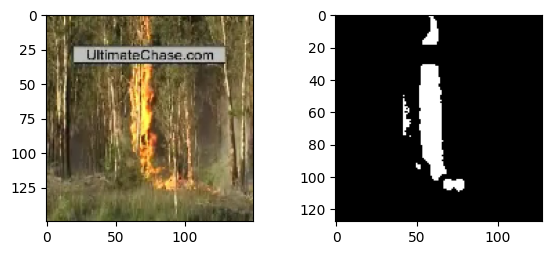

In [ ]:
result_segmentation = detectFire("/content/drive/MyDrive/CV/Proyek Akhir/Kelompok 2 Proyek Akhir PKAC/frame2_24.jpg")
# untuk path citra dapat diganti atau disesuaikan dengan lokasi google drive atau lokal laptop Bapak nggih

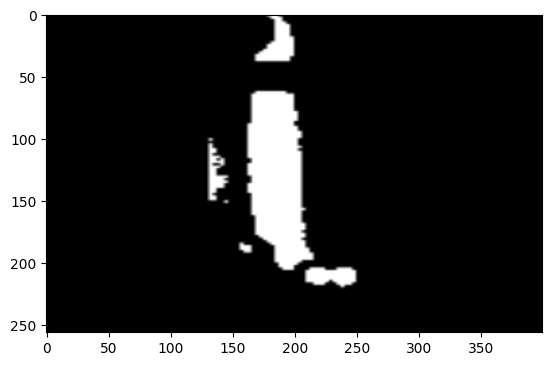

In [ ]:
plt.imshow(result_segmentation, cmap='gray')

1/1 [==============================] - 0s 74ms/step


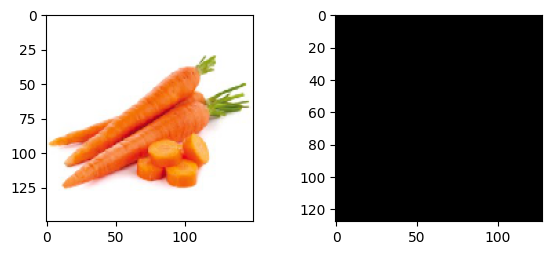

In [ ]:
result_segmentation = detectFire("/content/drive/MyDrive/CV/Proyek Akhir/Kelompok 2 Proyek Akhir PKAC/externtest4.jpg")
# untuk path citra dapat diganti atau disesuaikan dengan lokasi google drive atau lokal laptop Bapak nggih

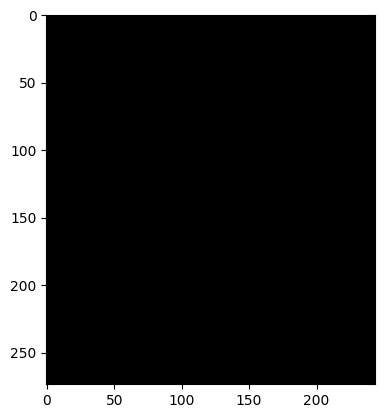

In [ ]:
plt.imshow(result_segmentation, cmap='gray')